 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/notebooks/reinforcement%20learning%20-%20tp3.ipynb#On-Policy-Reinforcement-Learning-with-Parametric-Policy" data-toc-modified-id="On-Policy-Reinforcement-Learning-with-Parametric-Policy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>On-Policy Reinforcement Learning with Parametric Policy</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/notebooks/reinforcement%20learning%20-%20tp3.ipynb#REINFORCE--(constant-step)" data-toc-modified-id="REINFORCE--(constant-step)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>REINFORCE  (constant step)</a></span></li><li><span><a href="http://localhost:8888/notebooks/notebooks/reinforcement%20learning%20-%20tp3.ipynb#REINFORCE-(Adam)" data-toc-modified-id="REINFORCE-(Adam)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>REINFORCE (Adam)</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/notebooks/reinforcement%20learning%20-%20tp3.ipynb#Off-Policy-Reinforcement-Learning-with-Value-Function-Approximation" data-toc-modified-id="Off-Policy-Reinforcement-Learning-with-Value-Function-Approximation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Off-Policy Reinforcement Learning with Value Function Approximation</a></span></li></ul></div>

In [1]:
#!pip install tqdm
#!pip install seaborn

In [2]:
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt
import seaborn
import sys
import os

%matplotlib inline

In [4]:
%load_ext autoreload

%autoreload 2

In [5]:
# Path to the scripts gridrender, gridworld, main_tp1_ex2 and mdp
sys.path.append(r"C:\Users\Nasser Benab\Documents\school\m.v.a\reinforcement_learning\tps\homework3\TP3_python")

# On-Policy Reinforcement Learning with Parametric Policy

In [6]:
from reinforce import REINFORCE
from steppers import ConstantStep, Adam
import lqg1d

In [7]:
# Define the environment 
env = lqg1d.LQG1D(initial_state_type='random')

The reward is given by: $r_{t} = -0.5(s_{t}^{T}s_{t} + a_{t}^{T}a_{t})$. The state and action space being bounded in [-500, 500]: $R_{min}=-250000$. By setting $T_{max} = O(-log(\frac{\delta}{R_{max}})/(1-\gamma))$, the discounted truncated sum or rewards is $\delta$-close to the infinite sum. Thus, we can choose $T_{max}=200$. 

*[Kakade et al., 2003, Sec. 2.3.3]*.

## REINFORCE  (constant step)

In [8]:
# REINFORCE using different learning rates
learning_rates = [10**(-i) for i in range(2, 6)]
theta_histories = {}
avg_returns = {}

for lr in learning_rates:
    reinforce = REINFORCE(env=env, stepper=ConstantStep(lr), N=100, T=200, 
                      n_itr=100, gamma=0.9)
    reinforce.compute_optimal_policy()
    theta_histories[lr] = reinforce.theta_history
    avg_returns[lr] = reinforce.avg_returns


100%|██████████| 100/100 [01:58<00:00,  1.21s/it]


In [9]:
def compute_distance(theta_history, theta_star=-0.59):
    """Compute distance between each theta at each iteration and the optimal 
    one (-0.59)
    """
    return [abs(theta - theta_star) for theta in theta_history]

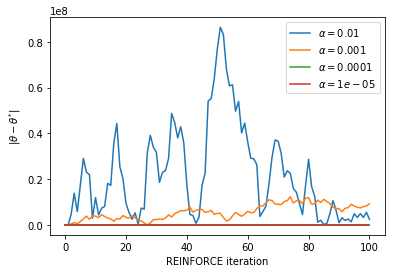

In [10]:
# Plot theta history for different learning rates
plt.figure()
for lr in learning_rates:
    plt.plot(compute_distance(theta_histories[lr]), label=r"$\alpha = {}$".format(lr))
plt.xlabel("REINFORCE iteration")
plt.ylabel(r"$|\theta - \theta^{*}|$")
plt.legend()
plt.show()

We can notice that the algorithm does not converge for $\alpha = 10^{-2}$ and $\alpha = 10^{-3}$. Let's only plot the results for $\alpha = 10^{-4}$ and $\alpha = 10^{-5}$:

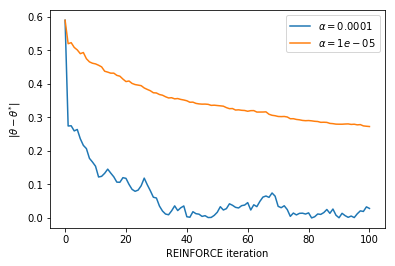

In [11]:
# Plot theta history for alpha = 1e-4 and alpha = 1e-5
plt.figure()
for lr in [0.0001, 1e-5]:
    plt.plot(compute_distance(theta_histories[lr]), label=r"$\alpha = {}$".format(lr))
plt.xlabel("REINFORCE iteration")
plt.ylabel(r"$|\theta - \theta^{*}|$")
plt.legend()
plt.show()

We can observe that after 100 iterations, $\theta$ is close to $\theta^{*}$ for $\alpha = 10^{-4}$, but there are many fluctuations. A lower $\alpha$ ($10^{-5}$) does not allow total convergence (slow) after 100 iterations but the curve is smoother. A higher number of iterations would probably lead to convergence for $\alpha = 10^{-5}$!

> A small $\alpha$ ensures that we do not overshoot the maximum of the expected discounted reward. 

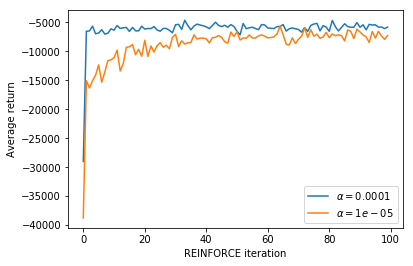

In [12]:
# Plot the average returns for alpha = 1e-4 and alpha = 1e-5
for lr in [0.0001, 1e-5]:
    plt.plot(avg_returns[lr], label=r"$\alpha = {}$".format(lr))
plt.xlabel("REINFORCE iteration")
plt.ylabel("Average return")
plt.legend()
plt.show()

Let's study the **effect of N** with a constant learning rate of $10^{-4}$:

In [13]:
# REINFORCE using different number of episodes in the simulations
lr = 0.0001
n_episodes = [10, 50, 100, 150, 200]
theta_histories = {}
avg_returns = {}

for N in n_episodes:
    reinforce = REINFORCE(env=env, stepper=ConstantStep(lr), N=N, T=200, 
                      n_itr=100, gamma=0.9)
    reinforce.compute_optimal_policy()
    theta_histories[N] = reinforce.theta_history
    avg_returns[N] = reinforce.avg_returns

100%|██████████| 100/100 [04:00<00:00,  2.50s/it]


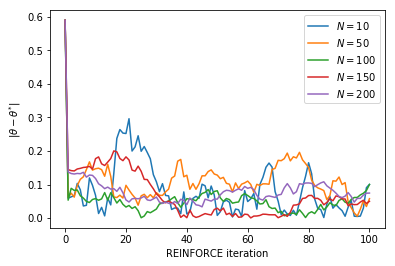

In [14]:
# Plot theta history for different number of episodes
plt.figure()
for N in n_episodes:
    plt.plot(compute_distance(theta_histories[N]), label=r"$N = {}$".format(N))
plt.xlabel("REINFORCE iteration")
plt.ylabel(r"$|\theta - \theta^{*}|$")
plt.legend()
plt.show()

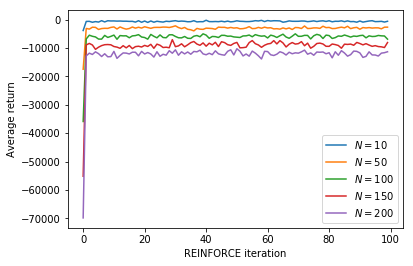

In [15]:
# Plot the average returns for different number of episodes
for N in n_episodes:
    plt.plot(avg_returns[N], label=r"$N = {}$".format(N))
plt.xlabel("REINFORCE iteration")
plt.ylabel("Average return")
plt.legend()
plt.show()

> With a higher N, the Monte Carlo estimate of the gradient of J is more precise, thus resulting in a lower variance. However, the average returns are lower when N grows, probably because we explore more states with bad rewards.

## REINFORCE (Adam)

In [16]:
# REINFORCE with Adam (alpha = 0.1 or 0.01)
learning_rates = [0.1, 0.01]
for lr in learning_rates:
    reinforce = REINFORCE(env=env, stepper=Adam(alpha=lr), N=100, T=200,                      
                          n_itr=100, gamma=0.9)
    reinforce.compute_optimal_policy()
    theta_histories[lr] = reinforce.theta_history
    avg_returns[lr] = reinforce.avg_returns

100%|██████████| 100/100 [02:03<00:00,  1.50s/it]


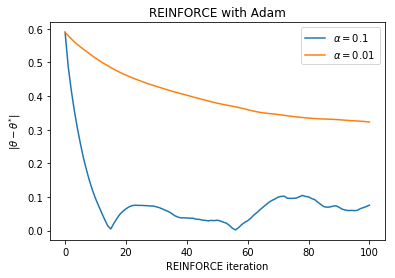

In [17]:
# Plot theta history
plt.figure()
for lr in learning_rates:
    plt.plot(compute_distance(theta_histories[lr]), label=r"$\alpha = {}$".format(lr))
plt.xlabel("REINFORCE iteration")
plt.ylabel(r"$|\theta - \theta^{*}|$")
plt.title("REINFORCE with Adam")
plt.legend()
plt.show()

With Adam, the convergence is smoother (faster with a starting learning rate of 0.1 which makes sense) !!

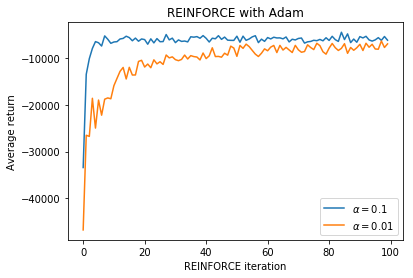

In [18]:
# Plot the average returns 
for lr in learning_rates:
    plt.plot(avg_returns[lr], label=r"$\alpha = {}$".format(lr))
plt.xlabel("REINFORCE iteration")
plt.ylabel("Average return")
plt.title("REINFORCE with Adam")
plt.legend()
plt.show()

# Off-Policy Reinforcement Learning with Value Function Approximation

In [32]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from lqg1d import LQG1D
from fqi import FQI

In [28]:
# Environment
env = LQG1D(initial_state_type="random")
# Discount factor
discount_factor = 0.9
# Time horizon
horizon = 50
# Number of roll-outs
n_episodes = 100
# Discrete set of actions
actions = discrete_actions = np.linspace(-8, 8, 20)

In [29]:
# Create an instance of the FQI class
fqi_ = FQI(env, actions=actions, n_episodes=n_episodes, horizon=horizon, 
           discount_factor=discount_factor)

In [30]:
# Perform 100 iterations of the FQI algorithm and estimate the performance
# at each iteration
fqi_.iterate(K=100, performance=True, alpha=0)

100%|██████████| 100/100 [00:22<00:00,  4.97it/s]


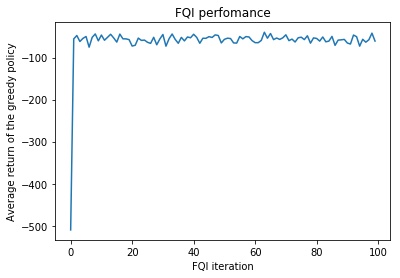

In [31]:
# Plot the average returns
plt.title("FQI perfomance")
plt.plot(fqi_.avg_returns)
plt.xlabel("FQI iteration")
plt.ylabel("Average return of the greedy policy")
plt.show()

Optimal K: [[-0.58840335]] Covariance S: 0.001


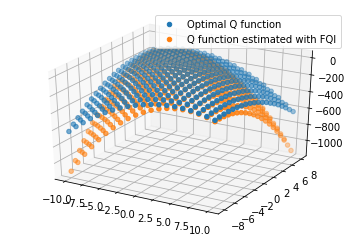

In [33]:
def make_grid(x, y):
    m = np.meshgrid(x, y, copy=False, indexing="ij")
    return np.vstack(m).reshape(2, -1).T

states = discrete_states = np.linspace(-10, 10, 20)
SA = make_grid(states, actions)
S, A = SA[:, 0], SA[:, 1]

K, cov = env.computeOptimalK(discount_factor), 0.001
print("Optimal K: {} Covariance S: {}".format(K, cov))

# Optimal Q function
Q_fun_ = np.vectorize(lambda s, a: env.computeQFunction(s, a, K, cov, discount_factor, 1))
Q_fun = lambda X: Q_fun_(X[:, 0], X[:, 1])

# Q function estimated with FQI
Q_opt = Q_fun(SA)
Q_fitted = np.diagonal(fqi_.Q(np.reshape(S, (400, 1)), A))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(S, A, Q_opt, label="Optimal Q function")
ax.scatter(S, A, Q_fitted, label="Q function estimated with FQI")
plt.legend()

plt.show()